### ENSF 611 Final Project: House Prices - Advanced Regression Techniques Kaglle Competition

#### Name: Samuel Sofela

##### 1. Importing the Data

Importing packages

In [153]:
!pip install xgboost

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)


Import the training and test datasets, and check them

In [155]:
train_pd=pd.read_csv('train.csv')
print("Shape of training data: ", train_pd.shape)
train_pd.head()

Shape of training data:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [156]:
test_pd=pd.read_csv('test.csv')
print("Shape of test data: ", test_pd.shape)
test_pd.head()

Shape of test data:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The test data is missing one column which is the target feature, SalesPrice

#### 2. Data Inspection

Now we inspect the data for any missing or null values in the columns

In [157]:
train_pd.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There seems to be some null values in the dataset. Next, columns with null values are inspected

The count of missing values:  6965

Columns with missing values are:

 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


<Axes: >

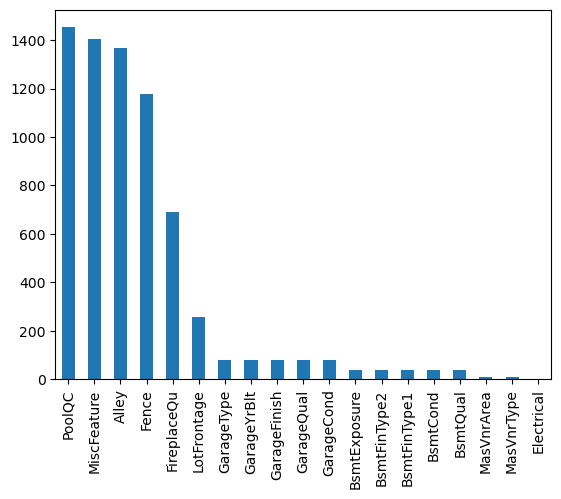

In [158]:

count_missing_values = train_pd.isnull().sum()
print("The count of missing values: ", count_missing_values.sum())

sorted_missing = count_missing_values[count_missing_values > 0].sort_values(ascending=False)

print("\nColumns with missing values are:\n\n", sorted_missing)

sorted_missing.plot.bar()


It can be seen that some features have a lot of null values such as POOLQC, MiscFeature, Alley. These features will be dropped because of the significantly high number of null values.


* PoolQC            (1453 null values)
* MiscFeature       (1406 null values)
* Alley             (1369 null values)
* Fence             (1179 null values)
* FireplaceQu       (690 null values)


The above columns will be dropped. The id column will also be dropped because it has no importance to the model. 
Other columns with null values will be handled during preprocessing using SimpleImputer

Finally the target feature sales price will be stored in a different variable.

In [159]:
y = train_pd['SalePrice']
X = train_pd.drop(columns=['Id', 'SalePrice', 'Alley',
                                    'FireplaceQu', 'PoolQC', 'MiscFeature'])

In [160]:
print("Target Vector Shape:", y.shape)
print("Feature Matrix Shape:", X.shape)

Target Vector Shape: (1460,)
Feature Matrix Shape: (1460, 75)


Inspecting the feature matrix

In [161]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


It can that there is a lot of variation in the features. For instance, LotArea varies from 1300 - 215245 while Overall quality varies from 1 - 10. There are also features with a minimum of zero and max of multiple digits. As such, StandardScaler will be used during preprocessing.

Next, we inspect the correlation of the dataset

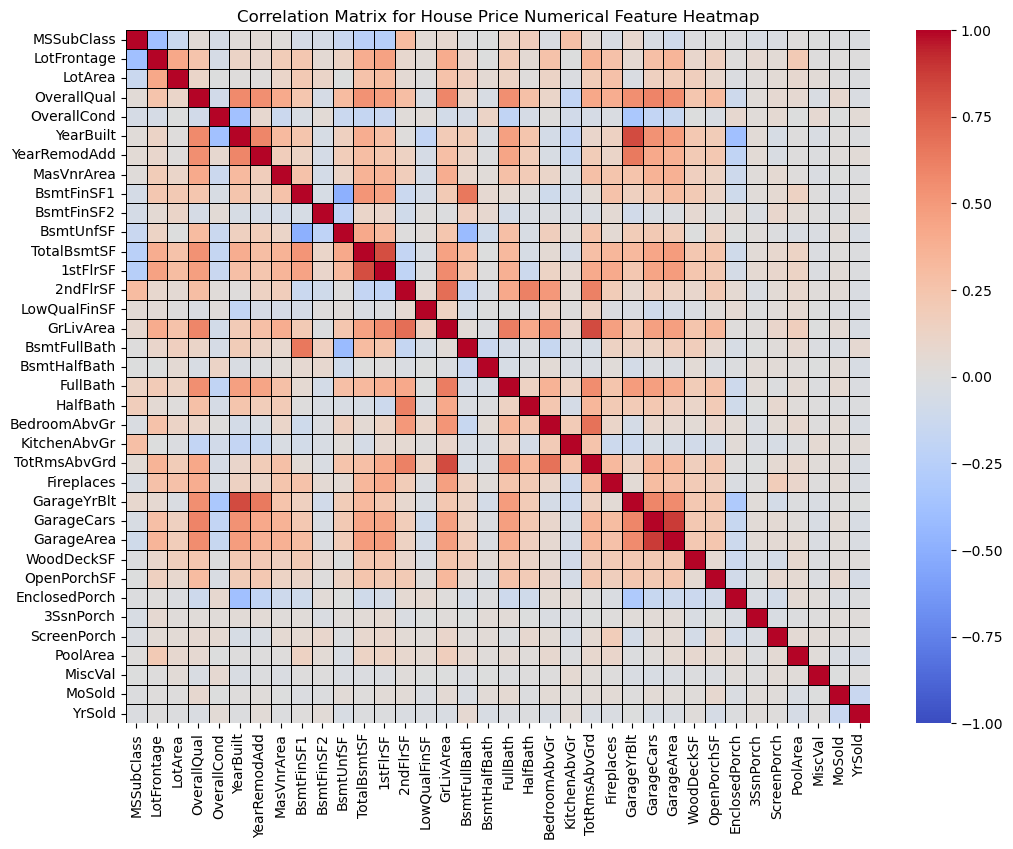

In [162]:
correlation_matrix= X.corr()

fig, ax = plt.subplots(figsize=(12,9))
ax.set_title("Correlation Matrix for House Price Numerical Feature Heatmap")
sns.heatmap(data=correlation_matrix, vmin=-1, vmax=1, cmap="coolwarm", ax=ax, linecolor='black', linewidth=0.5);


From the correlation matrix, it seems most the features are not strongly correlated. Some of the features that exhibit significant correlation are:

- GarageCars and GarageArea
- GarageYrBuilt and YearBuilt
- TotRmsAbvGr and GrLivArea
- 1stFlrSF and TotalBsmtSF
- BsmtUnfSF and BsmtFinSF1

The heatmap gives a general overview of the correlations between numerial features.
Overall, the number of strongly correlated features is small relative to the total correlations.


Next, we inspect the distribution of the target feature, SalePrice

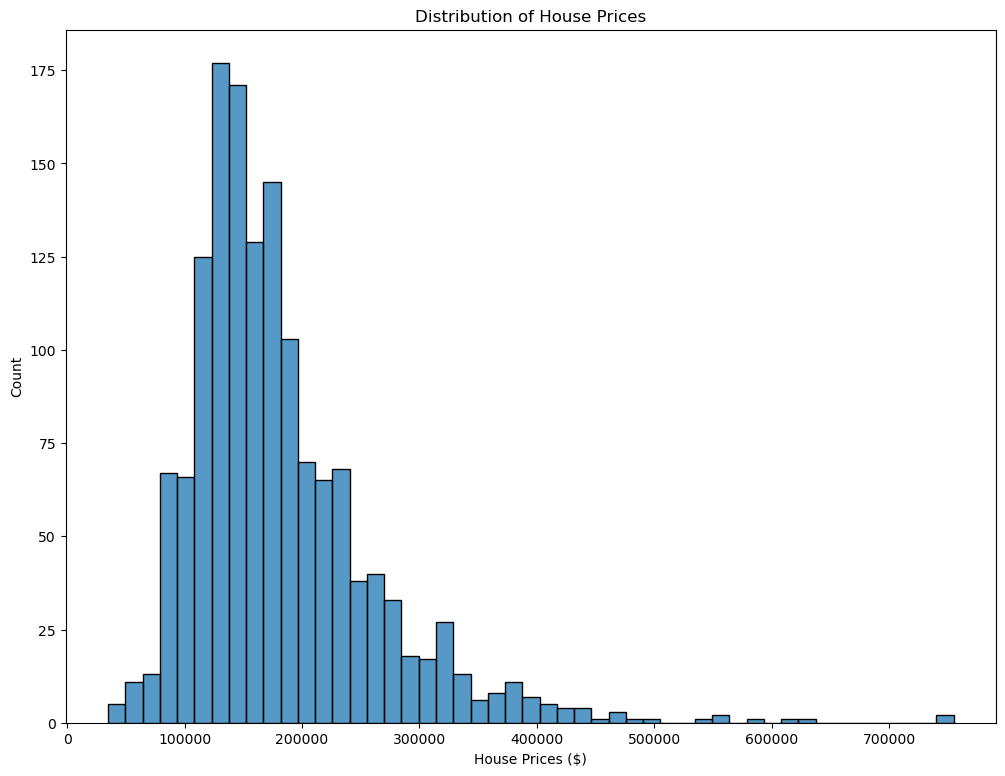

In [163]:
fig, ax = plt.subplots(figsize=(12,9))
#ax.set_title("House Price Numerical Feature Heatmap")
plot = sns.histplot(y, ax=ax)
plot.set(xlabel = "House Prices ($)", ylabel = "Count", title = "Distribution of House Prices");

The house prices range from $34,900 to $755,000 but most of the prices fall between $100,000 and $300,000

#### 3. Data Preprocessing

From prior inspection, it was observed that the feature matrix contains both numerical and categorical data. The first thing to do it to separate the the 2 forms of data and encode the categorical data.

Extracting features that need to be encoded

In [164]:
X_category = X.select_dtypes(include='object')
print(X_category.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')


Although OneHotEncoder is suitable for most of these features, there are some features that can be ranked. For instance KitchenQual which is Kitchen Quality can be ranked as Ex:Excellent, Gd:Good, TA:Typical/Average, Fa:Fair, Po:Poor. For such features, OrdinalEncoder will be suitable. 

The features that OrdinalEncoder will be used for are:

- LotShape = {IR3, IR2, IR1, REG}
- LandSlope = {Sev, Mod, Gtl}
- ExterQual = {Po, Fa, TA, Gd, Ex}
- ExterCond = {Po, Fa, TA, Gd, Ex}
- BsmtQual = {Po, Fa, TA, Gd, Ex}
- BsmtCond = {Po, Fa, TA, Gd, Ex}
- BsmtExposure = {No, Mn, Av, Gd}
- BsmtFinType1 = {Unf, LwQ, Rec, BLQ, ALQ, GLQ}
- BsmtFinType2 = {Unf, LwQ, Rec, BLQ, ALQ, GLQ}
- HeatingQC = {Po, Fa, TA, Gd, Ex}
- CentralAir = {N, Yes}
- KitchenQual = {Po, Fa, TA, Gd, Ex}
- GarageFinish = {Unf, RFn, Fin}
- GarageQual = {Po, Fa, TA, Gd, Ex}
- GarageCond = {Po, Fa, TA, Gd, Ex}


The features were selected after reviewing the dataset description (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

#### Implementing OrdinalEcoder

Also, GarageYearBult is a numerical quantity cannot be converted to a year of zero. It will be equated to the YearBuilt which is original construction date

In [165]:
for index in range(0, 1460):
    if(np.isnan(X['GarageYrBlt'][index])):
        X['GarageYrBlt'][index] = X['YearBuilt'][index]

It should be noted that some rankings are repeated such as with GarageQual and GarageCond. 

In [166]:
# import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

lot_shape = ['IR3', 'IR2', 'IR1', 'Reg']
land_slope = ['Sev', 'Mod', 'Gtl']
qual_cond = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_exposure = ['No', 'Mn', 'Av', 'Gd']
bsmt_fin = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', "GLQ"]
central_air = ['N', 'Y']
garage_fin = ['Unf', 'RFn', 'Fin']

# Feature to be Ordinal Encoded
ordinal_column_list = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC','CentralAir', 'KitchenQual',
                       'GarageFinish', 'GarageQual', 'GarageCond']

# Extracting the features
X_ordinal_part = X[ordinal_column_list]

# List of ordinal categories for the features.
ordinal_categories = [lot_shape, land_slope, qual_cond, qual_cond, qual_cond, qual_cond,
                      bsmt_exposure, bsmt_fin, bsmt_fin,  qual_cond, central_air, qual_cond,
                    garage_fin, qual_cond, qual_cond]

# Encoding the Ordinal dataset, any NaN values have been converted to -1
ordinal_model = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=ordinal_categories)
X_ordinal = ordinal_model.fit_transform(X_ordinal_part)
print(X_ordinal.shape)

(1460, 15)


Remove Ordinal Encoded features from feature matrix

In [167]:
X_clmntrans = X.drop(columns=ordinal_column_list)

Next, numerical data are separated for scaling using standardScaler while remaining categorical data are encoded using OneHotEncoder. Null numerical values are replaced with 0. The MSSubclass is a numerical value but its meaning is categorical as it indicated the the building class. It will be treated as a categorical data

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Features to be converted through OneHotEncoder
ohe_feature_list = ['MSSubClass', 'MSZoning', 'Street', 'LandContour',
                        'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
                        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                        'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
                        'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']

# Features to be converted through StandardScaler
scaling_feature_list = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
                        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                        'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
                        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                        'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

# Creating a pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())])

# Configuring the ColumnTransformer
ct_ohe_scaling = ColumnTransformer(
                                [ ("stdscl", numeric_transformer, scaling_feature_list),
                                 ("ohe", OneHotEncoder(sparse=False, handle_unknown='ignore'), ohe_feature_list)])


The standard processing steps are followed to fit and transform the data

In [169]:
ct_ohe_scaling.fit(X_clmntrans)
X_ohe_scl = ct_ohe_scaling.transform(X_clmntrans)
print(X_ohe_scl.shape)

X_combined = np.concatenate([X_ohe_scl, X_ordinal], axis=1)
print("Shape of preprocessed Dataset: ",X_combined.shape)

(1460, 222)
Shape of preprocessed Dataset:  (1460, 237)


After preprocessing the feature size has increased to 237 from 75 (after dropping significantly null values). The dataset is used for our machine learning models

#### 4. Making the Model

To predict housing prices, a regression model iis required. The following regression models will be explored.

- Linear Regression
- RandomForestRegressor
- GradientBoostingRegressor
- XGBRegressor
- SVR


The root-mean-squared-error (RMSE) will be evaluated for each model. The aim of the competition is to keep the RMSE as low as possible by comparing the lowest values for each model. 

In Lab2, a similar model was developed using the concrete dataset from yellowbricks. The get_regressor_neg_rms() from the lab will be adapted in this project. 

In [170]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms)
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    
    
    #TODO: add function body here
    #setting name of type of test score
    score_type = ['neg_root_mean_squared_error']

    #retrieving score using cross-validate()
    score = cross_validate(estimator=model, X=X, y=y, cv=cv, scoring=score_type, return_train_score=True)
  
    score_train = score['train_' + score_type[0]].mean()
    score_test = score['test_' + score_type[0]].mean()

    return (score_train, score_test)

In [171]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

model_list = [LinearRegression(), SVR(), RandomForestRegressor(random_state=64), 
              GradientBoostingRegressor(random_state=79), xgb.XGBRegressor()]

#RMSE is in dollar unit, therefore will print RMSE to two decimal places
for model in model_list:
    score_train, score_test = get_regressor_neg_rms(model, X_combined, y)
    print("\n\nModel:", model)
    print("\tTraining RMSE ={:.0f}".format(score_train))
    print("\tValidation RMSE ={:.0f}".format(score_test))



Model: LinearRegression()
	Training RMSE =-22215
	Validation RMSE =-80742190403579


Model: SVR()
	Training RMSE =-81333
	Validation RMSE =-80967


Model: RandomForestRegressor(random_state=64)
	Training RMSE =-11233
	Validation RMSE =-29810


Model: GradientBoostingRegressor(random_state=79)
	Training RMSE =-14017
	Validation RMSE =-25986


Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1

The LinearRegression model has the 2nd worst traiining RMSE (-22215) however the validation RMSE is worse with a value of -80742190403579. This implies that it was not able to capture to appropriately capture the encoded feature. 

The SVR has similar training and validation RMSE (low variance) but performs worse and the remaining 3 models. The validation score of -80967 is about 3x those of the remaining models (random forest, gradient boosting and xg boosting regressors).

The RandomForestRegressor (RFR) model has high variance and is an indication of overfitting. It has a training and validation RMSE of -11233 and -29810 respetively.

The GradientBoostingRegressor (GBR) model, similar to the RFR model has high variance and is an indication of overfitting. It has a training and validation RMSE of -14017 and -25986 respetively. The lower training score relative to the validation score is an indication of overfitting.


The XGBoostRegressor (XGBR) model, has the lowest training RMSE of -1577. However, it also suffers from high variance with a validation RMSE of -31034. This is anindication of overfitting. 


The GBR model has the best validation RMSE. The hyperparameters of all the models (except linear regression which as the worst performing model) will be tuned for improved performance



#### 5. Finding a better model

In [172]:
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.1f")

#### GradientBoostingRegressor

Using GridSearchCV to  search for the best hyperparameters. The hyperparameters tuned are: 
- learning_rate: [ 0.1, 0.4, 0.7]
- max_depth: [2, 5, 9]
- n_estimators: [50, 100, 200, 400, 800]

In [173]:
from sklearn.model_selection import GridSearchCV
model_GB = GradientBoostingRegressor(random_state=79)
full_param_list_GB = {
    'learning_rate': [ 0.1, 0.4, 0.7],
    'max_depth': [2, 5, 9],
    'n_estimators': [50, 100, 200, 400, 800],
}

grid_search_GB = GridSearchCV(estimator=model_GB, param_grid=full_param_list_GB, scoring='neg_root_mean_squared_error')
grid_search_GB.fit(X_combined, y)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=79),
             param_grid={'learning_rate': [0.1, 0.4, 0.7],
                         'max_depth': [2, 5, 9],
                         'n_estimators': [50, 100, 200, 400, 800]},
             scoring='neg_root_mean_squared_error')

In [174]:
print(grid_search_GB.best_score_)
print(grid_search_GB.best_params_)

-25119.918574984935
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 800}


The best performing hyperparameter is: learning_rate: 0.1, max_depth: 2, n_estimators: 800.

learning_rate of 0.1 and max_depth of 2 are at the the edge. I further fine tune for this hyperparameters using n_estimators= 900

In [175]:
from sklearn.model_selection import GridSearchCV
model_GB = GradientBoostingRegressor(random_state=79, n_estimators=900)
full_param_list_GB = {
    'max_depth': [1, 2, 5, 8],
    'max_features': [0.1, 0.4, 0.7, 1]
}

grid_search_GB1 = GridSearchCV(estimator=model_GB, param_grid=full_param_list_GB, scoring='neg_root_mean_squared_error')
grid_search_GB1.fit(X_combined, y)

GridSearchCV(estimator=GradientBoostingRegressor(n_estimators=900,
                                                 random_state=79),
             param_grid={'max_depth': [1, 2, 5, 8],
                         'max_features': [0.1, 0.4, 0.7, 1]},
             scoring='neg_root_mean_squared_error')

In [176]:
print(grid_search_GB1.best_score_)
print(grid_search_GB1.best_params_)

-24565.709968599356
{'max_depth': 2, 'max_features': 0.7}


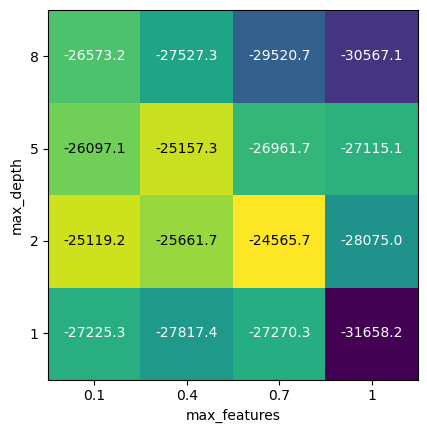

In [177]:
plot_grid_search_results(grid_search_GB1)

The best RMSE is -24565.709968599356 using max_depth = 2 and max_features = 0.7. These values are not at the edges and can be considered the best for n_estimator= 900

#### RandomForestRegressor

Using GridSearchCV to search for the best hyperparameters. The hyperparameters tuned are: 
- max_features: [0.3, 0.5, 0.7, 0.9]
- max_depth: [1, 3, 7, 11, 13]

In [178]:
model_RF = RandomForestRegressor(random_state=50)
full_param_list_RF = {
    'max_features': [0.3, 0.5, 0.7, 0.9],
    'max_depth': [1, 3, 7, 11, 13]
}

grid_search_RF = GridSearchCV(estimator=model_RF, param_grid=full_param_list_RF, scoring='neg_root_mean_squared_error')
grid_search_RF.fit(X_combined, y)

GridSearchCV(estimator=RandomForestRegressor(random_state=50),
             param_grid={'max_depth': [1, 3, 7, 11, 13],
                         'max_features': [0.3, 0.5, 0.7, 0.9]},
             scoring='neg_root_mean_squared_error')

In [179]:
print(grid_search_RF.best_score_)
print(grid_search_RF.best_params_)

-28162.51081954232
{'max_depth': 13, 'max_features': 0.5}


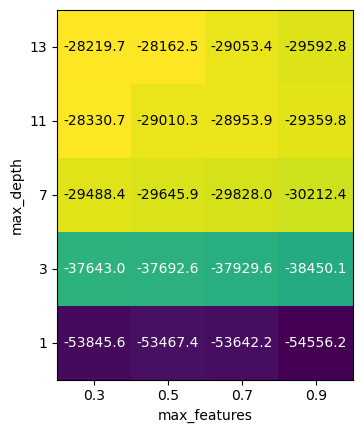

In [180]:
plot_grid_search_results(grid_search_RF)

The best RMSE is -28162.51081954232 using max_depth = 13 and max_features = 0.5. 

#### XGBoostRegressor

Using GridSearchCV to  search for the best hyperparameters. The hyperparameters tuned are: 
- learning_rate: [0.05, 0.1, 0.3, 0.5]
- max_depth: [1, 3, 4, 5]

In [181]:
model_GSCV = xgb.XGBRegressor(verbosity=0)
full_param_list = {
    'max_depth': [1,3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.3, 0.5]
}

grid_search_XG = GridSearchCV(estimator=model_GSCV, param_grid=full_param_list, scoring='neg_root_mean_squared_error')
grid_search_XG.fit(X_combined, y)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                        

In [182]:
print(grid_search_XG.best_score_)
print(grid_search_XG.best_params_)

-27267.064925592298
{'learning_rate': 0.1, 'max_depth': 3}


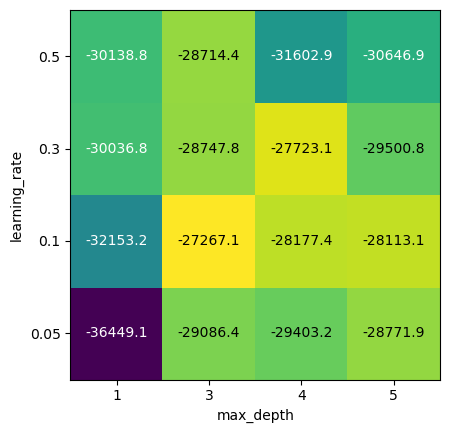

In [183]:
plot_grid_search_results(grid_search_XG)

The best RMSE is -27267.064925592298 using max_depth = 3 and learning_rate = 0.1

#### 6. Retraining the Best Model


The best model hyperparameters are used to retrain the model
GradientBoostingRegressor
- max_depth=2 
- max_features=0.7
- n_estimators=900

In [184]:
best_model = grid_search_GB1.best_estimator_
best_model.fit(X_combined,y)

GradientBoostingRegressor(max_depth=2, max_features=0.7, n_estimators=900,
                          random_state=79)

#### 7. Evaluating the best model on test data

The test dataset was separated from the training dataset by Kaggle and stored in an excel file. This test csv file is used. However, the data requires preprocessing similar to the training dataset. The preprocessing flow used for the training dataset is applied to the testing dataset here

In [185]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Training Data:\nRoot mean squared error = {0:.0f}, R-squared score = {1:.3f}"
      .format(mean_squared_error(y, y_pred, squared=False), r2_score(y, y_pred)))

Training Data:
Root mean squared error = 9516, R-squared score = 0.986


#### Preprocessing Testing Dataset

In [186]:
#loading test data
pd_test = pd.read_csv('test.csv').fillna(np.nan)
print(pd_test.shape)

# Dropping target feature and columns with large null values
X_test = house_price_test.drop(columns=['Id', 'Alley',
                                    'FireplaceQu', 'PoolQC', 'MiscFeature'])

# Using OrdinalEncoder to encode ordinal categorical data
X_test_ordinal_part = X_test[ordinal_column_list]
X_test_ordinal = ordinal_model.fit_transform(X_test_ordinal_part)

# Separating the ordinal encoded features from the rest of the test data
X_test_trans = X_test.drop(columns=ordinal_column_list)

# Applying the same Column Transfomer used on the test data (StandardScaler-SimpleImputer & OneHotEncoder)
X_test_ohe_scl = ct_ohe_scaling.transform(X_test_trans)

# Using numpy concatenate() to combine the data (ColumnTransformed + Ordinal Encoded)
X_test_combined = np.concatenate([X_test_ohe_scl, X_test_ordinal], axis=1)

(1459, 80)


In [187]:
y_test_pred = best_model.predict(X_test_combined)
y_pred = best_model.predict(X_combined)

In [188]:
y_pred

array([206897.36167247, 176380.77012547, 211494.95782441, ...,
       275560.43343796, 144687.45291372, 149139.55035019])

Comparing Predicted and Actual Prices

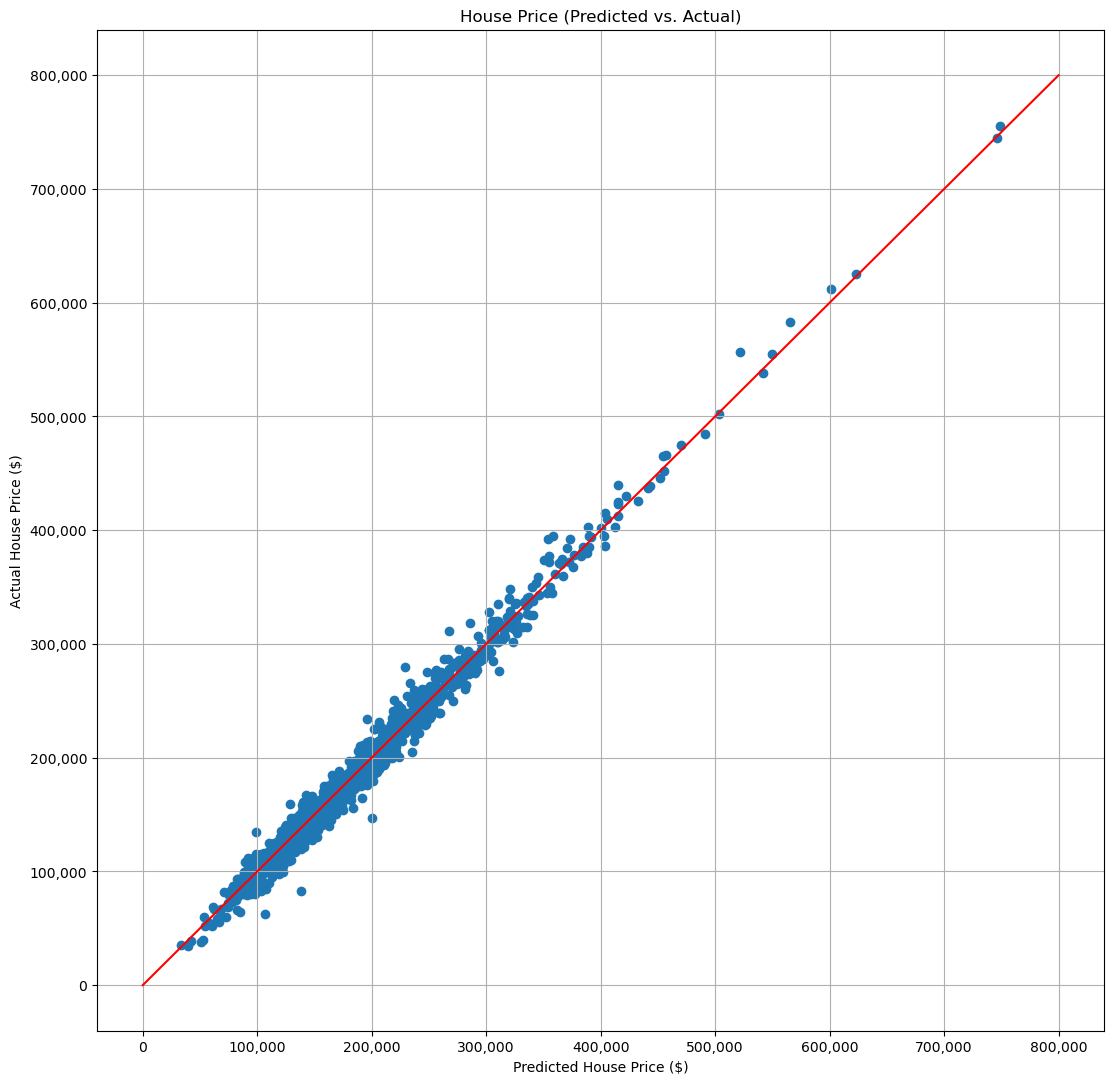

In [189]:
fig, ax = plt.subplots(1, figsize=(13, 13))
plt.scatter(x=y_pred, y=y);
plt.plot([0,800000], [0,800000], '-r');
plt.title("House Price (Predicted vs. Actual)");
plt.xlabel("Predicted House Price ($)");
plt.ylabel("Actual House Price ($)");
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.grid(visible=True)

Using a scatterplot, predicted house prices is shown on the x axis and the difference between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where visualize errors.

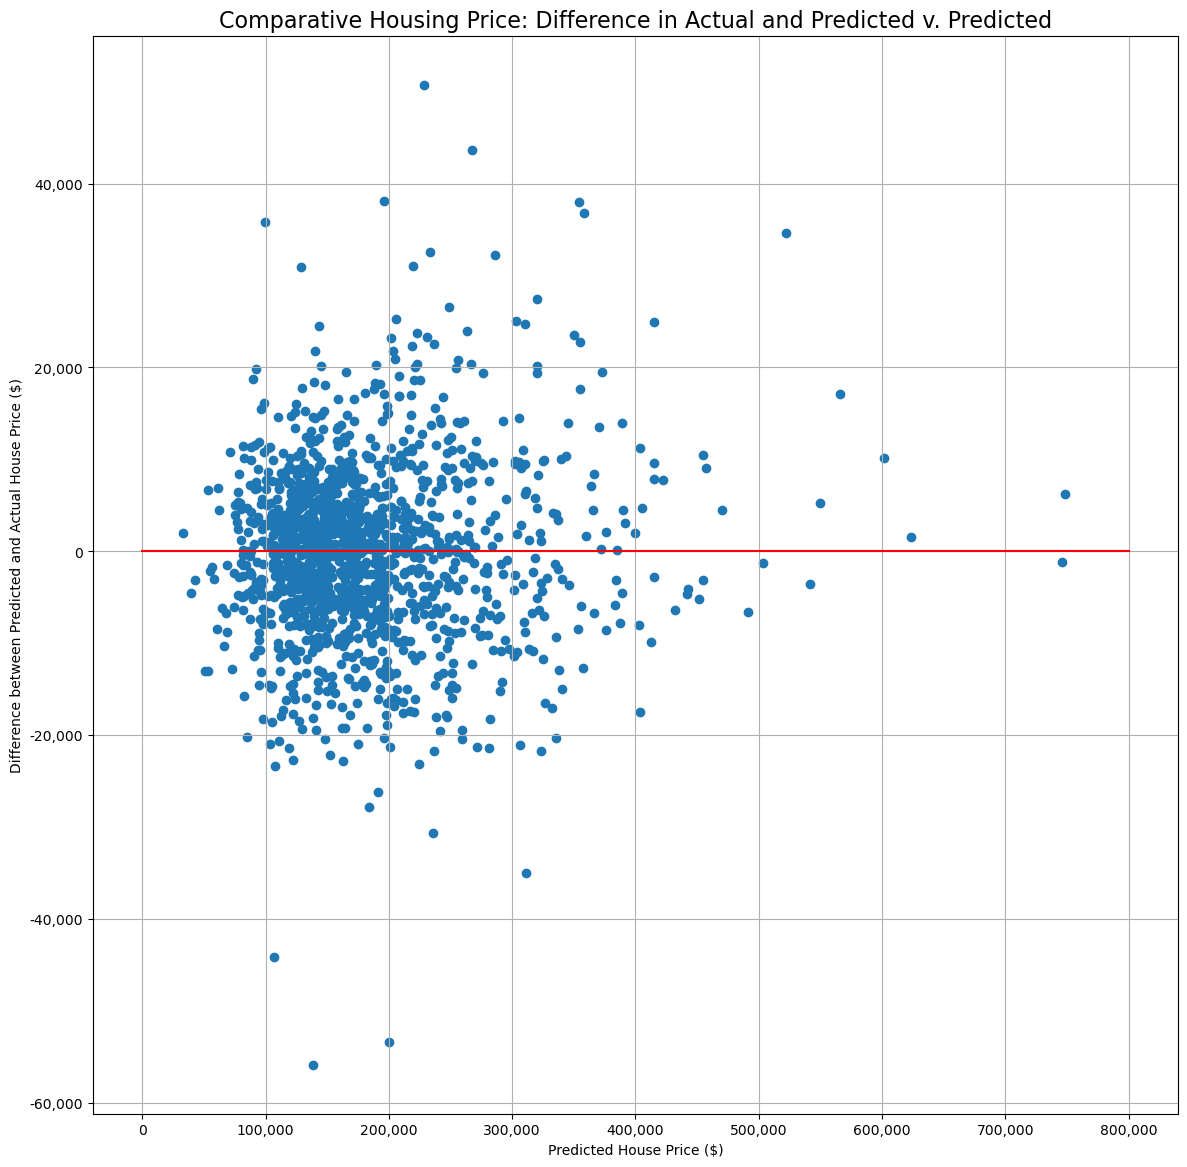

In [190]:
fig, ax = plt.subplots(1, figsize=(14, 14))
plt.scatter(x=y_pred, y=y-y_pred);
plt.plot([0,800000], [0,0], '-r');
plt.title("Comparative Housing Price: Difference in Actual and Predicted v. Predicted", fontsize=16);
plt.xlabel("Predicted House Price ($)");
plt.ylabel("Difference between Predicted and Actual House Price ($)");
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.grid(visible=True)

The residual plot shows the error between predicted house price were mostly between -15,000 and +15,000.

#### 8. Exporting predictions to csv and submitting to Kaggle

In [191]:
#creating empty dataframe to store predictions
submission = pd.DataFrame()

#storing Id of each row
submission['Id'] = pd_test.Id

#adding housing price prediction column
submission['SalePrice'] = y_test_pred

In [192]:
submission.head()

,Id,SalePrice
0,1461,119929.526983
1,1462,165979.943357
2,1463,184730.585265
3,1464,195098.576880
4,1465,177389.997318


In [193]:
# Saving to CSV
submission.to_csv('submission1.csv', index=False)

#### 9. Interpretation

 The goal of this project was to enter a Kaggle competition on prediction of housing prices using advanced machine learning techniques. To this end, four machine learning models were used: LinearRegression(LR), RandomForestRegressor (RFR), GradientBoostingRegressor(GBR) and XGBoostRegressor(XGBR). The training data initially had a shape of  (1460, 81). Features with significantly large number of null values were dropped. The resulting feature matrix was evaluated for correlation. The feature matrix was then preprocessed which increased the number of features to (1460, 237)  because of OneHotEncoder and OrdinalEncoder applied to the categorical data.

After preprocessing, cross validation was used to evaluate different models to identify the best performing model. The models used were LR, SVR, RFR, GBR and XGBR. The negative-root-mean-square (RMSE) was the metric used to evaluate the models. The RMSE for SVR and LR were very high with values of -80742190403579 and -80967 respectively. As a result, these models were not used to hyperparameter tuning. RFR, GBR and XGBR has RMSE values of -29810, -25986 and -3103 respectively.


Hyperparameters were tuned for the 3 selected models. Gridsearch was used in finding best model parameters. Learning_rate, max_depth and n_estimators were tuned for GBR. It was observed that increasing the n_estimators improved the RMSE with the best hyperparameters being learning_rate = 0.1, max_depth= 2, n_estimators=800 giving the best RMSE of -25119.91. This was further tuned with n_estimators=900 and resulted in better RMSE of -24565.71 for max_depth=2 and max_features= 0.7. 

For RFR, max_depth and max_features hyperparameters were tuned and values of max_depth=13 and max_features = 0.5 gave the best RMSE of -28162.51. Finally XGBR was applied to the dataset by tuning learning_rate and max_depth. The best RMSE of -27267.06 was obtained using learning_rate = 0.1 and max_depth = 3. 

Overall, GradientBoostingRegressor with n_estimators=900, max_depth=2 and max_features= 0.7 has the best RMSE of -24565.71. The final valiadtoin RMSE with the training dataset was 9516 with R^2 value of 0.986. A plot of the actual vs. predicted house prices showed that the house prices didnot deviate significantly from the unity line. Most of the points were clustered within 15000 of the unity line. 
